# Comparison of Different Classification Algorithms

## Loading modules

In [1]:
import pandas as pd
import numpy as np
% pylab inline
import operator
import re
from collections import OrderedDict
import seaborn as sns
import pickle
import os.path
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
from pylab import rcParams
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## Setting some plot colors and parameters

In [2]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
# Adapted from http://spartanideas.msu.edu/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
cmap_set1 = ListedColormap(['#4daf4a', '#377eb8', '#e41a1c' ])

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
sns.set_style('ticks')

## Setting data frame display

In [3]:
pd.set_option('display.max_columns', None)

## Loading the data

We have acquired and merged the data in [this notebook](https://github.com/aajains/springboard-datascience-intensive/blob/master/capstone_project/DataAcquisitionMerging/data_acquisition_merging.ipynb). The merged data was also cleaned by fixing the missing values in [this notebook](https://github.com/aajains/springboard-datascience-intensive/blob/master/capstone_project/DataCleaning/data_cleaning.ipynb). A lot of features from the cleaned data was removed (or some features were selected) in [this notebook](https://github.com/aajains/springboard-datascience-intensive/blob/master/capstone_project/EDA/ExploratoryDataAnalysis_v1.ipynb). The resultant csv file is loaded below:

In [4]:
df = pd.read_csv("../Data/ExploredDataCleaned/FlightHistory_Weather_Jan2015-Dec2016_Top20Airports_Window60mins_ExploredCleaned.csv")

In [5]:
df.shape

(2857139, 69)

In [6]:
df.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,Carrier,Origin,Dest,Cancelled,Distance,Nflights_10,DepDelayMedian_10,DepDelayMax_10,ArrDelayMedian_10,ArrDelayMax_10,TaxiOutMedian_10,TaxiInMedian_10,Ncan_10,Ndiv_10,Nflights_20,DepDelayMedian_20,DepDelayMax_20,ArrDelayMedian_20,ArrDelayMax_20,TaxiOutMedian_20,TaxiInMedian_20,Ncan_20,Ndiv_20,Nflights_30,DepDelayMedian_30,DepDelayMax_30,ArrDelayMedian_30,ArrDelayMax_30,TaxiOutMedian_30,TaxiInMedian_30,Ncan_30,Ndiv_30,CRSDepHr,CRSArrHr,Temperature_Origin,DewPoint_Origin,Humidity_Origin,WindSpeed_Origin,WindDirection_Origin,Visibility_Origin,Pressure_Origin,Condition_Origin,Temperature_Dest,DewPoint_Dest,Humidity_Dest,WindSpeed_Dest,WindDirection_Dest,Visibility_Dest,Pressure_Dest,Condition_Dest,Month_Dest,DayOfMonth_Dest,DayOfWeek_Dest,TempFlight_30,TempFlight_20,TempFlight_10,AllCanceled_30,AllDiverted_30,AllCanceled_20,AllDiverted_20,AllCanDiv_20,AllCanDiv_30,AllCanceled_10,AllDiverted_10,AllCanDiv_10
0,0,1,1,4,AA,PHX,DFW,1.0,868.0,10,-2.0,0.0,-2.5,17.0,13.0,4.0,0.0,0.0,14,-2.0,0.0,-0.5,17.0,13.0,5.0,0.0,0.0,14,-2.0,0.0,-0.5,17.0,13.0,5.0,0.0,0.0,2,5,37.0,30.0,76.0,3.5,320.0,10.0,30.04,Scattered Clouds,33.1,27.0,78.0,8.1,350.0,10.0,30.34,Light Rain,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,4,NK,PHX,DFW,0.0,868.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,37.0,30.9,79.0,4.6,300.0,10.0,30.03,Mostly Cloudy,33.1,27.0,78.0,8.1,350.0,10.0,30.34,Light Rain,1,1,4,1,1,1,0,0,0,0,0,0,0,0,0
2,2,1,1,4,DL,DEN,ATL,0.0,1199.0,10,3.5,48.0,-7.5,52.0,15.0,6.5,0.0,0.0,12,3.5,48.0,-7.5,52.0,14.5,6.5,0.0,0.0,12,3.5,48.0,-7.5,52.0,14.5,6.5,0.0,0.0,0,5,7.0,-8.0,51.0,15.0,170.0,10.0,30.22,Clear,33.1,26.1,75.0,3.5,310.0,10.0,30.32,Partly Cloudy,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1,1,4,NK,LAS,MSP,0.0,1299.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,34.0,17.1,50.0,9.2,190.0,10.0,29.99,Mostly Cloudy,16.0,10.0,77.0,8.1,240.0,10.0,29.90,Overcast,1,1,4,1,1,1,0,0,0,0,0,0,0,0,0
4,4,1,1,4,NK,LAS,DFW,0.0,1055.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,32.0,17.1,54.0,10.4,190.0,10.0,30.00,Mostly Cloudy,33.1,27.0,78.0,8.1,350.0,10.0,30.34,Light Rain,1,1,4,1,1,1,0,0,0,0,0,0,0,0,0


In [7]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [8]:
df.head()

,Month,DayofMonth,DayOfWeek,Carrier,Origin,Dest,Cancelled,Distance,Nflights_10,DepDelayMedian_10,DepDelayMax_10,ArrDelayMedian_10,ArrDelayMax_10,TaxiOutMedian_10,TaxiInMedian_10,Ncan_10,Ndiv_10,Nflights_20,DepDelayMedian_20,DepDelayMax_20,ArrDelayMedian_20,ArrDelayMax_20,TaxiOutMedian_20,TaxiInMedian_20,Ncan_20,Ndiv_20,Nflights_30,DepDelayMedian_30,DepDelayMax_30,ArrDelayMedian_30,ArrDelayMax_30,TaxiOutMedian_30,TaxiInMedian_30,Ncan_30,Ndiv_30,CRSDepHr,CRSArrHr,Temperature_Origin,DewPoint_Origin,Humidity_Origin,WindSpeed_Origin,WindDirection_Origin,Visibility_Origin,Pressure_Origin,Condition_Origin,Temperature_Dest,DewPoint_Dest,Humidity_Dest,WindSpeed_Dest,WindDirection_Dest,Visibility_Dest,Pressure_Dest,Condition_Dest,Month_Dest,DayOfMonth_Dest,DayOfWeek_Dest,TempFlight_30,TempFlight_20,TempFlight_10,AllCanceled_30,AllDiverted_30,AllCanceled_20,AllDiverted_20,AllCanDiv_20,AllCanDiv_30,AllCanceled_10,AllDiverted_10,AllCanDiv_10
0,1,1,4,AA,PHX,DFW,1.0,868.0,10,-2.0,0.0,-2.5,17.0,13.0,4.0,0.0,0.0,14,-2.0,0.0,-0.5,17.0,13.0,5.0,0.0,0.0,14,-2.0,0.0,-0.5,17.0,13.0,5.0,0.0,0.0,2,5,37.0,30.0,76.0,3.5,320.0,10.0,30.04,Scattered Clouds,33.1,27.0,78.0,8.1,350.0,10.0,30.34,Light Rain,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,4,NK,PHX,DFW,0.0,868.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,37.0,30.9,79.0,4.6,300.0,10.0,30.03,Mostly Cloudy,33.1,27.0,78.0,8.1,350.0,10.0,30.34,Light Rain,1,1,4,1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,4,DL,DEN,ATL,0.0,1199.0,10,3.5,48.0,-7.5,52.0,15.0,6.5,0.0,0.0,12,3.5,48.0,-7.5,52.0,14.5,6.5,0.0,0.0,12,3.5,48.0,-7.5,52.0,14.5,6.5,0.0,0.0,0,5,7.0,-8.0,51.0,15.0,170.0,10.0,30.22,Clear,33.1,26.1,75.0,3.5,310.0,10.0,30.32,Partly Cloudy,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,4,NK,LAS,MSP,0.0,1299.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,34.0,17.1,50.0,9.2,190.0,10.0,29.99,Mostly Cloudy,16.0,10.0,77.0,8.1,240.0,10.0,29.90,Overcast,1,1,4,1,1,1,0,0,0,0,0,0,0,0,0
4,1,1,4,NK,LAS,DFW,0.0,1055.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,32.0,17.1,54.0,10.4,190.0,10.0,30.00,Mostly Cloudy,33.1,27.0,78.0,8.1,350.0,10.0,30.34,Light Rain,1,1,4,1,1,1,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(2857139, 68)

There are some variables with numerical values and some variables with categories. For numerical variables, we do not have to worry about labelling. However, we will need to perform label encoding for the categorical variables. There are also some variables that are already in binary form, so that also does not need any labeling. Let's first identify all the numerical, categorical and binary variables.

In [10]:
numvar = ["Distance", "Nflights_10", "DepDelayMedian_10", "DepDelayMax_10", "ArrDelayMedian_10",
          "ArrDelayMax_10", "TaxiOutMedian_10", "TaxiInMedian_10", "Ncan_10", "Ndiv_10", "Nflights_20",
          "DepDelayMedian_20", "DepDelayMax_20", "ArrDelayMedian_20", "ArrDelayMax_20", "TaxiOutMedian_20",
          "TaxiInMedian_20", "Ncan_20", "Ndiv_20", "Nflights_30", "DepDelayMedian_30", "DepDelayMax_30", 
          "ArrDelayMedian_30", "ArrDelayMax_30", "TaxiOutMedian_30", "TaxiInMedian_30", "Ncan_30", 
          "Ndiv_30", "Temperature_Origin", "DewPoint_Origin", "Humidity_Origin", "WindSpeed_Origin", 
          "WindDirection_Origin", "Visibility_Origin", "Pressure_Origin", "Temperature_Dest", "DewPoint_Dest",
          "Humidity_Dest", "WindSpeed_Dest", "WindDirection_Dest", "Visibility_Dest", "Pressure_Dest"]
catvar = ["Month", "DayofMonth", "DayOfWeek", "Carrier", "Origin", "Dest", "CRSDepHr", "CRSArrHr", 
          "Condition_Origin", "Condition_Dest", "Month_Dest", "DayOfMonth_Dest", "DayOfWeek_Dest"]
binvar = ["TempFlight_30", "TempFlight_20", "TempFlight_10", "AllCanceled_30", "AllDiverted_30", 
          "AllCanceled_20", "AllDiverted_20", "AllCanDiv_20", "AllCanDiv_30", "AllCanceled_10", 
          "AllDiverted_10", "AllCanDiv_10"]

## Converting string values to numerical values in all categorical columns

In [11]:
#One-hot-encoding
for cvar in catvar:
    df = pd.concat([df, pd.get_dummies(df[cvar], prefix=cvar, dummy_na=False)], axis=1)
    df.drop([cvar], axis=1, inplace=True)

In [12]:
df.shape

(2857139, 331)

In [13]:
colnames = list(df.columns[1:])

## Creating feature matrix and target vector

In [14]:
X = df.drop(["Cancelled"], axis=1).values
y = df.Cancelled.astype(int).values

In [15]:
X.shape

(2857139, 330)

## Splitting the data into train (75%) and test (25%) sets

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=20)
for train_index, test_index in sss1.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [17]:
X_train.shape

(2142854, 330)

In [18]:
X_test.shape

(714285, 330)

Just to make sure that stratified shuffle split led to train and test with same fraction of positive class, lets calculate the fractions.

In [19]:
sum(df.iloc[train_index].Cancelled == 1)/len(train_index)

0.011486550180273598

In [20]:
sum(df.iloc[test_index].Cancelled == 1)/len(test_index)

0.011487011487011487

They are indeed quite similar.

# Logistic Regression (class_weight="balanced")

In [25]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline as ppl

steps = [("scaler", MinMaxScaler(feature_range=(0,1))),
         ("model", LogisticRegression(random_state=40, class_weight="balanced"))]

pipe = ppl(steps)

# Parameters
param_grid = dict(model__C = [0.0001, 0.001, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10],
                  model__penalty = ['l2']
                  )
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
LRbal = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 2,
                           cv = cv,
                          n_jobs=3,
                          scoring='average_precision',
                          iid=False)

LRbal.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] ............... model__C=0.0001, model__penalty=l2, total= 2.6min
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] ............... model__C=0.0001, model__penalty=l2, total= 2.8min
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] ............... model__C=0.0001, model__penalty=l2, total= 2.7min
[CV] model__C=0.001, model__penalty=l2 ...............................
[CV] ............... model__C=0.0001, model__penalty=l2, total= 2.3min
[CV] model__C=0.001, model__penalty=l2 ...............................
[CV] ............... model__C=0.0001, model__penalty=l2, total= 2.8min
[CV] model__C=0.001, model__penalty=l2 ...............................
[CV] ...........

[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 52.6min


[CV] model__C=0.5, model__penalty=l2 .................................
[CV] .................. model__C=0.5, model__penalty=l2, total= 7.0min
[CV] model__C=0.5, model__penalty=l2 .................................
[CV] .................. model__C=0.5, model__penalty=l2, total= 7.7min
[CV] model__C=0.5, model__penalty=l2 .................................
[CV] .................. model__C=0.5, model__penalty=l2, total= 6.5min
[CV] model__C=1, model__penalty=l2 ...................................
[CV] .................. model__C=0.5, model__penalty=l2, total= 6.0min
[CV] model__C=1, model__penalty=l2 ...................................
[CV] .................. model__C=0.5, model__penalty=l2, total= 7.7min
[CV] model__C=1, model__penalty=l2 ...................................
[CV] .................... model__C=1, model__penalty=l2, total= 9.4min
[CV] model__C=1, model__penalty=l2 ...................................
[CV] .................... model__C=1, model__penalty=l2, total= 8.7min
[CV] m

[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed: 140.6min finished


NameError: name 'plots' is not defined

In [30]:
LRbal.best_params_

{'model__C': 10, 'model__penalty': 'l2'}

In [35]:
LRbal.best_score_

0.14385317371629816

In [37]:
LRbal.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.10874, std: 0.00395, params: {'model__C': 0.0001, 'model__penalty': 'l2'},
 mean: 0.12769, std: 0.00357, params: {'model__C': 0.001, 'model__penalty': 'l2'},
 mean: 0.13697, std: 0.00341, params: {'model__C': 0.01, 'model__penalty': 'l2'},
 mean: 0.13928, std: 0.00343, params: {'model__C': 0.02, 'model__penalty': 'l2'},
 mean: 0.14146, std: 0.00344, params: {'model__C': 0.05, 'model__penalty': 'l2'},
 mean: 0.14252, std: 0.00348, params: {'model__C': 0.1, 'model__penalty': 'l2'},
 mean: 0.14314, std: 0.00348, params: {'model__C': 0.2, 'model__penalty': 'l2'},
 mean: 0.14356, std: 0.00348, params: {'model__C': 0.5, 'model__penalty': 'l2'},
 mean: 0.14371, std: 0.00349, params: {'model__C': 1, 'model__penalty': 'l2'},
 mean: 0.14379, std: 0.00348, params: {'model__C': 2, 'model__penalty': 'l2'},
 mean: 0.14384, std: 0.00349, params: {'model__C': 5, 'model__penalty': 'l2'},
 mean: 0.14385, std: 0.00347, params: {'model__C': 10, 'model__penalty': 'l2'}]

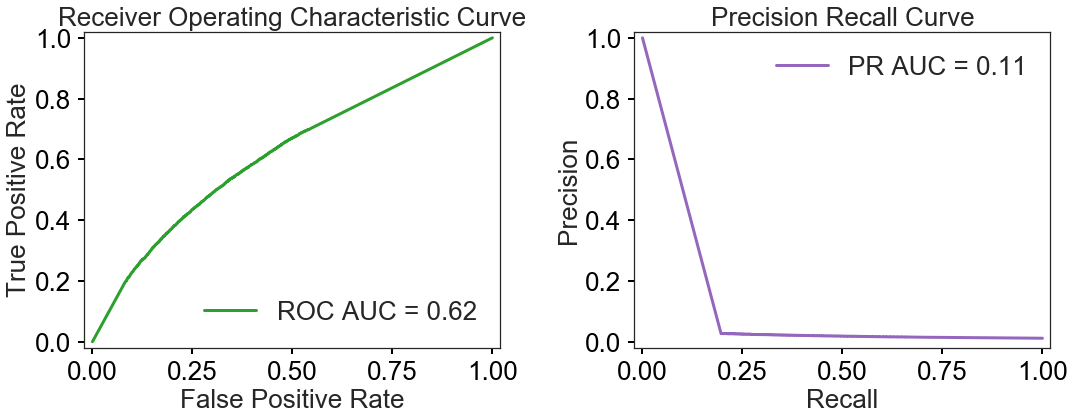

In [43]:
plots(LRbal.best_estimator_.steps[-1][1], X_test, y_test, outputfile='LR_bal.pdf')

# Logistic Regression (RUS)

In [38]:
%%time
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as pl
# Steps for pipeline
steps = [("rus", RandomUnderSampler(random_state=30)),
         ("scaler", MinMaxScaler(feature_range=(0,1))),
         ("model", LogisticRegression(random_state=40))]
pipe = pl(steps)

# Parameters
param_grid = dict(model__C = [0.0001, 0.001, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10],
                  model__penalty = ['l2']
                  )
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
LRrus = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 2,
                           cv = cv,
                          n_jobs=3,
                          scoring='average_precision',
                          iid=False)
# Training using CV
LRrus.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] ............... model__C=0.0001, model__penalty=l2, total= 1.2min
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] ............... model__C=0.0001, model__penalty=l2, total= 1.7min
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] ............... model__C=0.0001, model__penalty=l2, total= 1.9min
[CV] model__C=0.001, model__penalty=l2 ...............................
[CV] ............... model__C=0.0001, model__penalty=l2, total= 1.5min
[CV] model__C=0.001, model__penalty=l2 ...............................
[CV] ............... model__C=0.0001, model__penalty=l2, total= 1.6min
[CV] model__C=0.001, model__penalty=l2 ...............................
[CV] ...........

[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 27.6min


[CV] model__C=0.5, model__penalty=l2 .................................
[CV] model__C=0.5, model__penalty=l2 .................................
[CV] .................. model__C=0.5, model__penalty=l2, total= 1.8min
[CV] .................. model__C=0.5, model__penalty=l2, total= 1.8min
[CV] .................. model__C=0.5, model__penalty=l2, total= 1.8min
[CV] model__C=0.5, model__penalty=l2 .................................
[CV] model__C=0.5, model__penalty=l2 .................................
[CV] model__C=1, model__penalty=l2 ...................................
[CV] .................. model__C=0.5, model__penalty=l2, total= 1.8min
[CV] .................. model__C=0.5, model__penalty=l2, total= 1.8min
[CV] .................... model__C=1, model__penalty=l2, total= 1.8min
[CV] model__C=1, model__penalty=l2 ...................................
[CV] model__C=1, model__penalty=l2 ...................................
[CV] model__C=1, model__penalty=l2 ...................................
[CV] .

[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed: 47.9min finished


CPU times: user 8min 21s, sys: 7min 7s, total: 15min 28s
Wall time: 48min 8s


In [39]:
LRrus.best_params_

{'model__C': 10, 'model__penalty': 'l2'}

In [40]:
LRrus.best_score_

0.14331988821629338

In [41]:
LRrus.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.09137, std: 0.00552, params: {'model__C': 0.0001, 'model__penalty': 'l2'},
 mean: 0.10493, std: 0.00464, params: {'model__C': 0.001, 'model__penalty': 'l2'},
 mean: 0.12441, std: 0.00389, params: {'model__C': 0.01, 'model__penalty': 'l2'},
 mean: 0.12893, std: 0.00376, params: {'model__C': 0.02, 'model__penalty': 'l2'},
 mean: 0.13205, std: 0.00404, params: {'model__C': 0.05, 'model__penalty': 'l2'},
 mean: 0.13337, std: 0.00430, params: {'model__C': 0.1, 'model__penalty': 'l2'},
 mean: 0.13479, std: 0.00448, params: {'model__C': 0.2, 'model__penalty': 'l2'},
 mean: 0.13730, std: 0.00460, params: {'model__C': 0.5, 'model__penalty': 'l2'},
 mean: 0.13926, std: 0.00459, params: {'model__C': 1, 'model__penalty': 'l2'},
 mean: 0.14100, std: 0.00460, params: {'model__C': 2, 'model__penalty': 'l2'},
 mean: 0.14261, std: 0.00459, params: {'model__C': 5, 'model__penalty': 'l2'},
 mean: 0.14332, std: 0.00458, params: {'model__C': 10, 'model__penalty': 'l2'}]

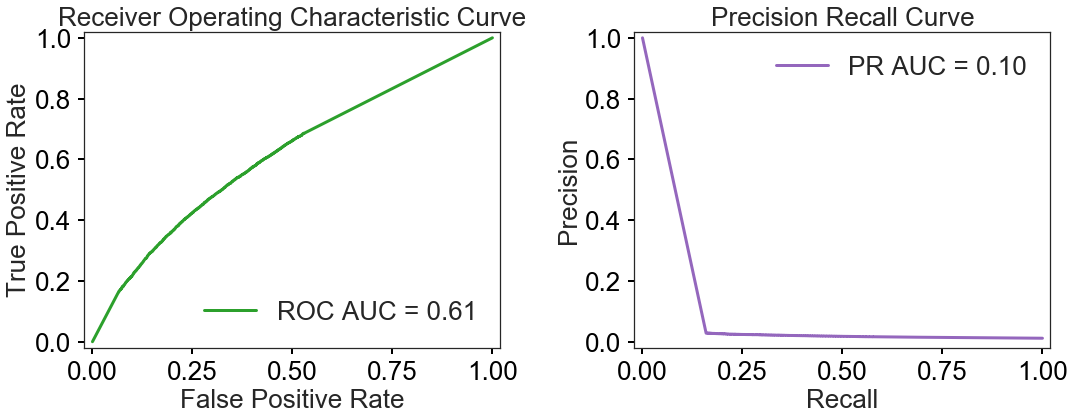

In [44]:
plots(LRrus.best_estimator_.steps[-1][1], X_test, y_test, outputfile='LR_rus.pdf')

Lets go ahead with class_weight="balanced", and pickle the LR model

In [45]:
import dill
dill.dump(LRbal, open('LogisticRegression.pkl', 'wb'))

In [46]:
LR = pickle.load( open( "LogisticRegression.pkl", "rb" ) )

In [48]:
y_pred_test_prob_LR = LR.best_estimator_.steps[-1][1].predict_proba(X_test)

### LR Done!

# Gaussian Naive Bayes (RUS)

In [22]:
%%time
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline as pl
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Steps for pipeline
steps = [("rus", RandomUnderSampler(random_state=30)),
         ("scaler", MinMaxScaler(feature_range=(0,1))), # though not needed
         ("model", GaussianNB())]

pipe = pl(steps)

# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

param_grid = dict(rus__ratio=["auto"])

# Setting up the grid search
GNBrus = GridSearchCV(pipe, param_grid = param_grid,
                           verbose = 2,
                           cv = cv,
                          n_jobs=3,
                          scoring='average_precision',
                          iid=False)
# Training using CV
GNBrus.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] rus__ratio=auto .................................................
[CV] rus__ratio=auto .................................................
[CV] rus__ratio=auto .................................................
[CV] .................................. rus__ratio=auto, total=  11.7s
[CV] rus__ratio=auto .................................................
[CV] .................................. rus__ratio=auto, total=  12.0s
[CV] rus__ratio=auto .................................................
[CV] .................................. rus__ratio=auto, total=  15.0s


[Parallel(n_jobs=3)]: Done   3 out of   5 | elapsed:   39.3s remaining:   26.2s


[CV] .................................. rus__ratio=auto, total=   7.3s
[CV] .................................. rus__ratio=auto, total=   7.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   56.3s finished


CPU times: user 14.9 s, sys: 4.08 s, total: 19 s
Wall time: 1min


In [23]:
GNBrus.best_score_

0.15750175534260644

In [24]:
GNBrus.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.15750, std: 0.01162, params: {'rus__ratio': 'auto'}]

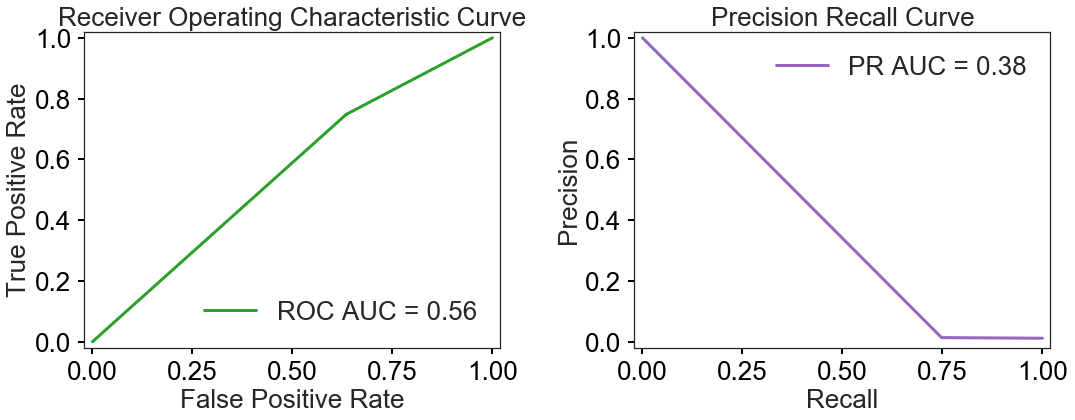

In [27]:
plots(GNBrus.best_estimator_.steps[-1][1], X_test, y_test, outputfile='GNB_rus.pdf')

# Gaussian Naive Bayes (SMOTE)

In [31]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pl

# Steps for pipeline
steps = [("smote", SMOTE(random_state=30)),
         ("scaler", MinMaxScaler(feature_range=(0,1))),
         ("model", GaussianNB())]

pipe = pl(steps)

# Parameters
param_grid = dict(smote__kind = ['regular', 'borderline1', 'borderline2'],
                 smote__k_neighbors = [5, 3, 1],
                 smote__m_neighbors = [12, 10, 6])
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
GNBsmote = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 3,
                           cv = cv,
                          n_jobs=3,
                          scoring='average_precision',
                          iid=False)
# Training using CV
GNBsmote.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12 
[CV] smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12 
[CV] smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12 
[CV]  smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12, score=0.476170, total= 1.2min
[CV] smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12 
[CV]  smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12, score=0.478751, total= 1.2min
[CV] smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12 
[CV]  smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12, score=0.469110, total= 1.2min
[CV] smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=10 
[CV]  smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12, score=0.479918, total= 1.3min
[CV]  smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12, score=0.489221, total= 1.3min
[C

[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 16.5min


[CV] smote__k_neighbors=5, smote__kind=borderline1, smote__m_neighbors=6 
[CV]  smote__k_neighbors=5, smote__kind=borderline1, smote__m_neighbors=6, score=0.421126, total= 1.7min
[CV] smote__k_neighbors=5, smote__kind=borderline1, smote__m_neighbors=6 
[CV]  smote__k_neighbors=5, smote__kind=borderline1, smote__m_neighbors=6, score=0.420394, total= 1.5min
[CV] smote__k_neighbors=5, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=5, smote__kind=borderline1, smote__m_neighbors=6, score=0.427335, total= 1.4min
[CV] smote__k_neighbors=5, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=5, smote__kind=borderline1, smote__m_neighbors=6, score=0.429362, total= 1.7min
[CV] smote__k_neighbors=5, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=5, smote__kind=borderline2, smote__m_neighbors=12, score=0.415579, total= 1.6min
[CV] smote__k_neighbors=5, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=5

[CV]  smote__k_neighbors=3, smote__kind=borderline1, smote__m_neighbors=6, score=0.424540, total= 1.7min
[CV] smote__k_neighbors=3, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=3, smote__kind=borderline1, smote__m_neighbors=6, score=0.431413, total= 1.9min
[CV] smote__k_neighbors=3, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=3, smote__kind=borderline1, smote__m_neighbors=6, score=0.428515, total= 1.8min
[CV] smote__k_neighbors=3, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=3, smote__kind=borderline2, smote__m_neighbors=12, score=0.421702, total= 1.8min
[CV] smote__k_neighbors=3, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=3, smote__kind=borderline2, smote__m_neighbors=12, score=0.417435, total= 1.9min
[CV] smote__k_neighbors=3, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=3, smote__kind=borderline2, smote__m_neighbors=12, score=0.407362, total=

[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=1, smote__kind=borderline1, smote__m_neighbors=6, score=0.427848, total= 2.0min
[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12, score=0.421398, total= 2.2min
[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12, score=0.432367, total= 2.3min
[CV]  smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12, score=0.427712, total= 2.2min


[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed: 74.4min


[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12 
[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=10 
[CV]  smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12, score=0.439365, total= 1.9min
[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=10 
[CV]  smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12, score=0.450784, total= 2.1min
[CV]  smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=10, score=0.415551, total= 2.1min
[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=10 
[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=10 
[CV]  smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=10, score=0.434623, total= 2.0min
[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=10 
[CV]  smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=10, score=0.428230, total= 2.1min
[CV] smote__k_neighb

[Parallel(n_jobs=3)]: Done 135 out of 135 | elapsed: 83.7min finished


CPU times: user 5min 58s, sys: 2min 29s, total: 8min 27s
Wall time: 1h 24min 8s


In [33]:
GNBsmote.best_params_

{'smote__k_neighbors': 5, 'smote__kind': 'regular', 'smote__m_neighbors': 12}

In [34]:
GNBsmote.best_score_

0.47863394585347885

In [36]:
GNBsmote.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.47863, std: 0.00649, params: {'smote__k_neighbors': 5, 'smote__kind': 'regular', 'smote__m_neighbors': 12},
 mean: 0.47863, std: 0.00649, params: {'smote__k_neighbors': 5, 'smote__kind': 'regular', 'smote__m_neighbors': 10},
 mean: 0.47863, std: 0.00649, params: {'smote__k_neighbors': 5, 'smote__kind': 'regular', 'smote__m_neighbors': 6},
 mean: 0.43507, std: 0.00502, params: {'smote__k_neighbors': 5, 'smote__kind': 'borderline1', 'smote__m_neighbors': 12},
 mean: 0.43282, std: 0.00264, params: {'smote__k_neighbors': 5, 'smote__kind': 'borderline1', 'smote__m_neighbors': 10},
 mean: 0.42454, std: 0.00346, params: {'smote__k_neighbors': 5, 'smote__kind': 'borderline1', 'smote__m_neighbors': 6},
 mean: 0.41643, std: 0.01266, params: {'smote__k_neighbors': 5, 'smote__kind': 'borderline2', 'smote__m_neighbors': 12},
 mean: 0.41572, std: 0.00911, params: {'smote__k_neighbors': 5, 'smote__kind': 'borderline2', 'smote__m_neighbors': 10},
 mean: 0.41198, std: 0.01038, params: {'smote_

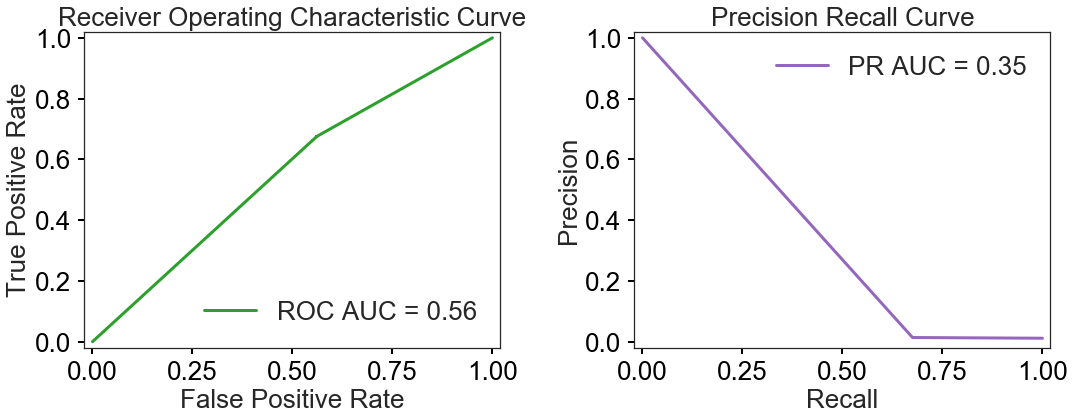

In [37]:
plots(GNBsmote.best_estimator_.steps[-1][1], X_test, y_test, outputfile='GNB_smote.pdf')

In [38]:
import dill
dill.dump(GNBrus, open('GNBrus.pkl', 'wb'))

In [39]:
import dill
dill.dump(GNBsmote, open('GNBsmote.pkl', 'wb'))

In [40]:
GNBrus = pickle.load( open( "GNBrus.pkl", "rb" ) )

In [41]:
GNBsmote = pickle.load( open( "GNBsmote.pkl", "rb" ) )

In [42]:
y_pred_test_prob_GNBrus = GNBrus.best_estimator_.steps[-1][1].predict_proba(X_test)

In [43]:
y_pred_test_prob_GNBsmote = GNBsmote.best_estimator_.steps[-1][1].predict_proba(X_test)

In [44]:
#GNB = pickle.load( open( "GaussianNB.pkl", "rb" ) )
#df1 = df.drop(["Month_Dest", "DayOfMonth_Dest", "DayOfWeek_Dest", "Nflights_10", "Nflights_20", 
#         "ArrDelayMax_30", "ArrDelayMax_20", "ArrDelayMax_10", "TaxiInMedian_20", "TaxiOutMedian_20"], 
#        axis=1, inplace=False)
#X1 = df1.drop(["Cancelled"], axis=1).values
#y1 = df1.Cancelled.astype(int).values

#sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=20)
#for train_index1, test_index1 in sss1.split(X1, y1):
#    X_train1, X_test1 = X1[train_index1], X1[test_index1]
#    y_train1, y_test1 = y1[train_index1], y1[test_index1]

In [45]:
#plots(GNB.steps[-1][1], X_test1, y_test1, outputfile='../Report/GNB_ROC_PR_plots.pdf')

In [46]:
#y_pred_test_prob1 = GNB.steps[-1][1].predict_proba(X_test1)

In [47]:
#del df1
#del X1
#del train_index1
#del test_index1
#del X_train1
#del X_test1

# Random Forest (class_weight="balanced")

In [23]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline as ppl
# Steps for pipeline
steps = [("model", RandomForestClassifier(random_state=40, oob_score = True))]
pipe = ppl(steps)

# Parameters
param_grid = dict(model__n_estimators = [200],
                  model__max_features = ['sqrt', 'log2'],
                  model__min_samples_leaf = [1, 5, 10, 20, 30],
                  model__class_weight = ['balanced']
                  )
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
RFbal = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 2,
                           cv = cv,
                          n_jobs=3,
                          scoring='average_precision',
                          iid=False)
# Training using CV
RFbal.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=200 
[CV] model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=200 
[CV] model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=200 
[CV]  model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=200, total=61.2min
[CV] model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=200 
[CV]  model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=200, total=61.3min
[CV] model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=200 
[CV]  model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=200, tota

[CV] model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=10, model__n_estimators=200 
[CV]  model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=5, model__n_estimators=200, total=37.5min
[CV] model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=10, model__n_estimators=200 
[CV]  model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=5, model__n_estimators=200, total=37.6min
[CV] model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=10, model__n_estimators=200 


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 657.1min


[CV]  model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=10, model__n_estimators=200, total=37.4min
[CV] model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=10, model__n_estimators=200 
[CV]  model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=10, model__n_estimators=200, total=37.4min
[CV]  model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=10, model__n_estimators=200, total=37.3min
[CV] model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=10, model__n_estimators=200 
[CV] model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=20, model__n_estimators=200 
[CV]  model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=10, model__n_estimators=200, total=37.3min
[CV] model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=20, model__n_estimators=200 
[CV]  model__class_weight=ba

[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 848.4min finished


CPU times: user 1h 2min 50s, sys: 6min 58s, total: 1h 9min 48s
Wall time: 15h 5min 31s


In [59]:
RFbal.best_score_

0.36789287236788498

In [60]:
RFbal.best_params_

{'model__class_weight': 'balanced',
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 1,
 'model__n_estimators': 200}

In [61]:
RFbal.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.36789, std: 0.00405, params: {'model__class_weight': 'balanced', 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 200},
 mean: 0.35942, std: 0.00431, params: {'model__class_weight': 'balanced', 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__n_estimators': 200},
 mean: 0.34540, std: 0.00480, params: {'model__class_weight': 'balanced', 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__n_estimators': 200},
 mean: 0.32793, std: 0.00385, params: {'model__class_weight': 'balanced', 'model__max_features': 'sqrt', 'model__min_samples_leaf': 20, 'model__n_estimators': 200},
 mean: 0.31758, std: 0.00486, params: {'model__class_weight': 'balanced', 'model__max_features': 'sqrt', 'model__min_samples_leaf': 30, 'model__n_estimators': 200},
 mean: 0.36539, std: 0.00422, params: {'model__class_weight': 'balanced', 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__n_estimators': 200},
 mean: 0.3442

In [62]:
RFbal.best_estimator_.steps[-1][1].oob_score_

0.98983925176423593

In [ ]:
RFbal.best_estimator_.steps[-1][1].fit(X_train, y_train)

In [57]:
plots(RFbal.best_estimator_.steps[-1][1], X_test, y_test, outputfile='RF_bal.pdf')

NotFittedError: Estimator not fitted, call `fit` before exploiting the model.

In [48]:
#RFbal_clf = RFbal.best_estimator_.steps[-1][1]
# Range of `n_estimators` values to explore.
#min_estimators = 10
#max_estimators = 200
#error_rate = []
#for i in range(min_estimators, max_estimators + 1):
#    RFbal_clf.set_params(n_estimators=i)
#    RFbal_clf.fit(X_train, y_train)
#    print(i)
#    # Record the OOB error for each `n_estimators=i` setting.
#    oob_error = 1 - RFbal_clf.oob_score_
#    error_rate.append(oob_error)

# Generate the "OOB error rate" vs. "n_estimators" plot.
#plot()

In [32]:
RF = pickle.load( open( "RandomForest.pkl", "rb" ) )

In [33]:
df2 = df.drop(["Nflights_10", "Ndiv_30", "Ndiv_20", "Ndiv_10", "AllCanceled_10", "AllCanceled_30", "AllCanceled_20",
             "TempFlight_10", "TempFlight_30", "TempFlight_20", "AllDiverted_10", "AllCanDiv_10", "AllDiverted_30", 
             "AllDiverted_20", "AllCanDiv_20", "AllCanDiv_30"], axis=1, inplace=False)
X2 = df2.drop(["Cancelled"], axis=1).values
y2 = df2.Cancelled.astype(int).values
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=10)
for train_index2, test_index2 in sss2.split(X2, y2):
    X_train2, X_test2 = X2[train_index2], X2[test_index2]
    y_train2, y_test2 = y2[train_index2], y2[test_index2]

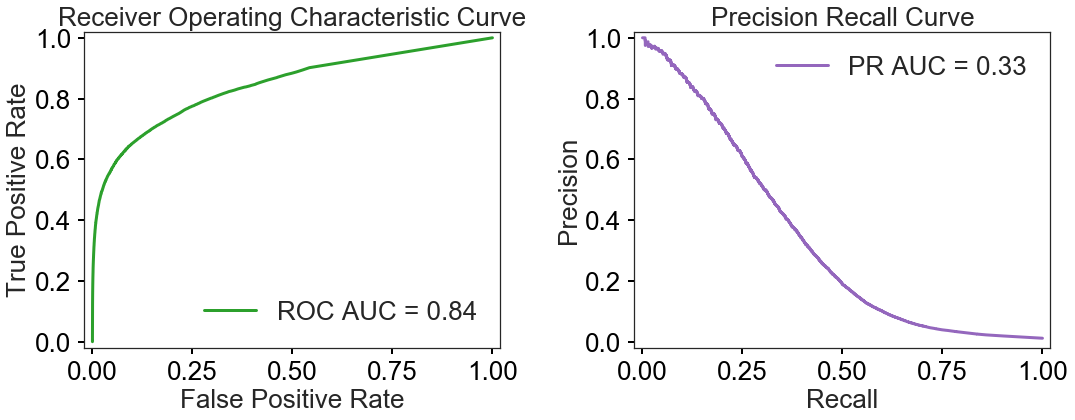

In [34]:
plots(RF, X_test2, y_test2, outputfile='../Report/RF_ROC_PR_plots.pdf')

In [35]:
y_pred_test_prob2 = RF.predict_proba(X_test2)

In [36]:
del df2
del X2
del y2
del X_test2
del X_train2

# Gradient Boosting

In [37]:
GBC = pickle.load( open( "GradientBoostingClassifier.pkl", "rb" ) )

In [38]:
df3 = df.drop(["WindSpeed_Dest", "Pressure_Dest", "DepDelayMax_10", "Pressure_Origin", "ArrDelayMedian_30", "CRSDepHr",
             "DepDelayMax_30", "ArrDelayMedian_20", "DepDelayMedian_10", "ArrDelayMax_10", "Nflights_10", 
             "TaxiInMedian_30", "ArrDelayMedian_10", "Nflights_30", "TaxiInMedian_20", "ArrDelayMax_30", 
             "DepDelayMax_20", "DepDelayMedian_20", "CRSArrHr", "DepDelayMedian_30", "ArrDelayMax_20", 
             "TaxiInMedian_10", "TaxiOutMedian_20", "TaxiOutMedian_30", "TaxiOutMedian_10", "Nflights_20", "Ndiv_30",
             "Ndiv_20", "Ndiv_10", "AllCanceled_10", "AllCanceled_20", "AllCanceled_30", "TempFlight_20", 
             "TempFlight_10", "TempFlight_30", "AllCanDiv_30", "AllDiverted_30", "AllDiverted_10", "AllDiverted_20",
             "AllCanDiv_20", "AllCanDiv_10"], axis=1, inplace=False)
X3 = df3.drop(["Cancelled"], axis=1).values
y3 = df3.Cancelled.astype(int).values
sss3 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=10)
for train_index3, test_index3 in sss3.split(X3, y3):
    X_train3, X_test3 = X3[train_index3], X3[test_index3]
    y_train3, y_test3 = y3[train_index3], y3[test_index3]

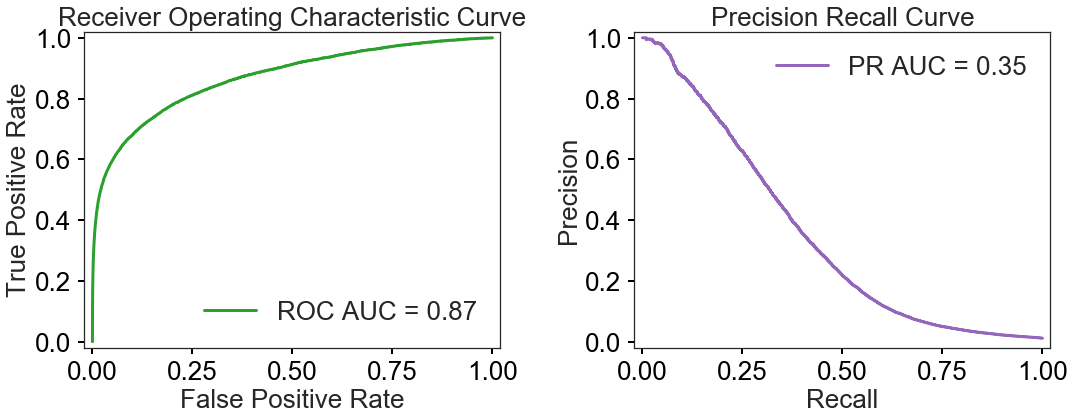

In [39]:
plots(GBC.steps[-1][1], X_test3, y_test3, outputfile='../Report/GBC_ROC_PR_plots.pdf')

In [40]:
y_pred_test_prob3 = GBC.steps[-1][1].predict_proba(X_test3)

In [41]:
del df3
del X3
del X_train3
del X_test3

# Extremely Randomized Trees

In [42]:
ET = pickle.load( open( "ExtraTree.pkl", "rb" ) )

In [43]:
df4 = df.drop(["ArrDelayMax_10", "DepDelayMax_10", "TaxiOutMedian_30", "TaxiOutMedian_20", "ArrDelayMax_20", 
             "ArrDelayMedian_10", "TaxiInMedian_30", "ArrDelayMedian_30", "DepDelayMax_20", "TaxiOutMedian_10",
             "TaxiInMedian_20", "ArrDelayMax_30", "ArrDelayMedian_20", "Nflights_30", "DepDelayMax_30", 
             "TaxiInMedian_10", "Nflights_20", "DepDelayMedian_30", "Nflights_10", "DepDelayMedian_20", 
             "DepDelayMedian_10", "Ndiv_30", "Ndiv_20", "Ndiv_10", "AllCanceled_10", "AllCanceled_20", 
             "AllCanceled_30", "TempFlight_10", "TempFlight_20", "TempFlight_30", "AllCanDiv_10", "AllCanDiv_30",
             "AllDiverted_30", "AllDiverted_20", "AllCanDiv_20", "AllDiverted_10"], axis=1, inplace=False)
catvar = ["Month", "DayofMonth", "DayOfWeek", "Carrier", "Origin", "Dest", "CRSDepHr", "CRSArrHr", 
          "Condition_Origin", "Condition_Dest", "Month_Dest", "DayOfMonth_Dest", "DayOfWeek_Dest"]
#OHE
for cvar in catvar:
    df4 = pd.concat([df4, pd.get_dummies(df4[cvar], prefix=cvar, dummy_na=False)], axis=1)
    df4.drop([cvar], axis=1, inplace=True)
X4 = df4.drop(["Cancelled"], axis=1).values
y4 = df4.Cancelled.astype(int).values
sss4 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=10)
for train_index4, test_index4 in sss4.split(X4, y4):
    X_train4, X_test4 = X4[train_index4], X4[test_index4]
    y_train4, y_test4 = y4[train_index4], y4[test_index4]

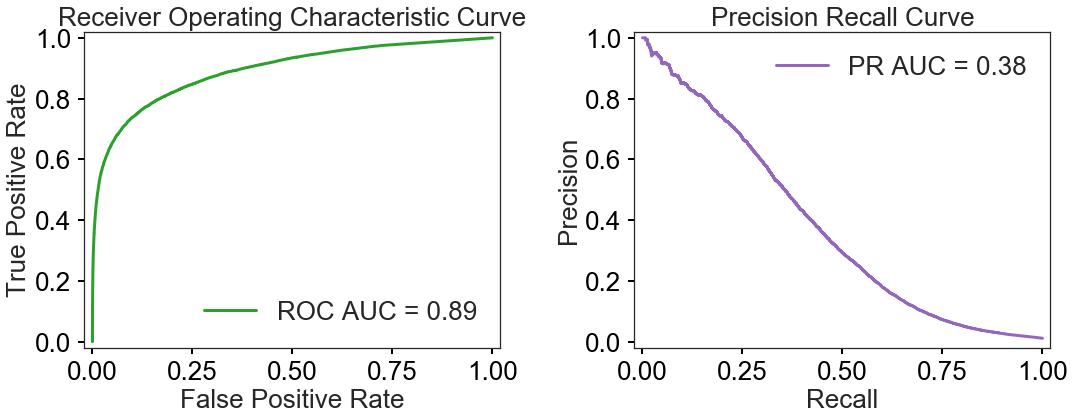

In [44]:
plots(ET, X_test4, y_test4, outputfile='../Report/ET_ROC_PR_plots.pdf')

In [45]:
y_pred_test_prob4 = ET.predict_proba(X_test4)

In [46]:
del df4
del X4
del X_train4
del X_test4

# Plotting ROC and PR curves for all models together

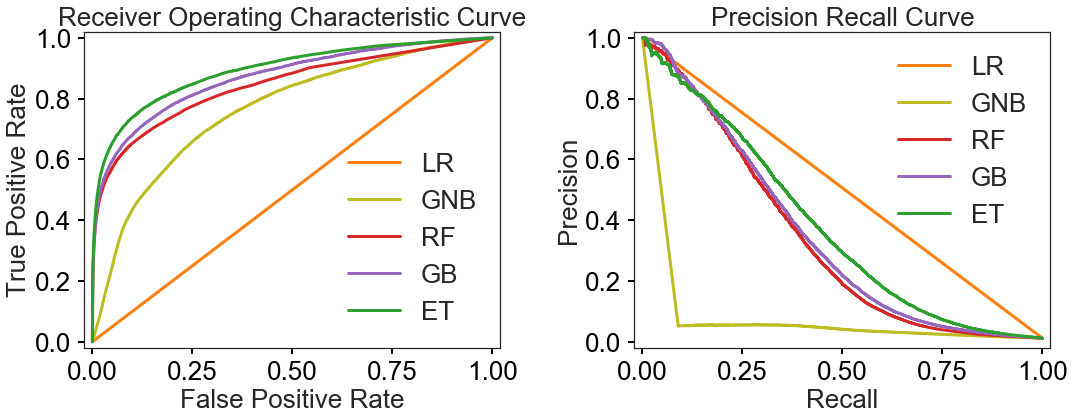

In [52]:
fs = 26
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
# ROC
ax1 = plt.subplot(1, 2, 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
ax1.plot(fpr, tpr, lw=1, label='LR', color=tableau20[2], linewidth=3)
fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_pred_test_prob1[:, 1])
ax1.plot(fpr1, tpr1, lw=1, label='GNB', color=tableau20[16], linewidth=3)
fpr2, tpr2, thresholds2 = roc_curve(y_test2, y_pred_test_prob2[:, 1])
ax1.plot(fpr2, tpr2, lw=1, label='RF', color=tableau20[6], linewidth=3)
fpr3, tpr3, thresholds3 = roc_curve(y_test3, y_pred_test_prob3[:, 1])
ax1.plot(fpr3, tpr3, lw=1, label='GB', color=tableau20[8], linewidth=3)
fpr4, tpr4, thresholds4 = roc_curve(y_test4, y_pred_test_prob4[:, 1])
ax1.plot(fpr4, tpr4, lw=1, label='ET', color=tableau20[4], linewidth=3)
ax1.set_xlim([-0.02, 1.02])
ax1.set_ylim([-0.02, 1.02])
ax1.set_xlabel('False Positive Rate', size=fs)
ax1.set_ylabel('True Positive Rate', size=fs)
ax1.set_title('Receiver Operating Characteristic Curve', size=fs)
ax1.tick_params(direction='out', length=6, width=2, colors='k', labelsize=fs)
ax1.legend(loc="lower right", fontsize=fs)
    
#PR
ax2 = plt.subplot(1, 2, 2)
prec, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob[:, 1])
ax2.plot(recall, prec, lw=1, label='LR', color=tableau20[2], linewidth=3)    
prec1, recall1, thresholds1 = precision_recall_curve(y_test1, y_pred_test_prob1[:, 1])
ax2.plot(recall1, prec1, lw=1, label='GNB', color=tableau20[16], linewidth=3)
prec2, recall2, thresholds2 = precision_recall_curve(y_test2, y_pred_test_prob2[:, 1])
ax2.plot(recall2, prec2, lw=1, label='RF', color=tableau20[6], linewidth=3)
prec3, recall3, thresholds3 = precision_recall_curve(y_test3, y_pred_test_prob3[:, 1])
ax2.plot(recall3, prec3, lw=1, label='GB', color=tableau20[8], linewidth=3)
prec4, recall4, thresholds4 = precision_recall_curve(y_test4, y_pred_test_prob4[:, 1])
ax2.plot(recall4, prec4, lw=1, label='ET', color=tableau20[4], linewidth=3)    
ax2.set_xlim([-0.02, 1.02])
ax2.set_ylim([-0.02, 1.02])
ax2.set_xlabel('Recall', size=fs)
ax2.set_ylabel('Precision', size=fs)
ax2.set_title('Precision Recall Curve', size=fs)
ax2.tick_params(direction='out', length=6, width=2, colors='k', labelsize=fs)
ax2.legend(loc="top right", fontsize=fs)
    
plt.tight_layout()
savefig('../Report/AllModels_ROC_PR_plots.pdf')

## Function to plot ROC and PR curves

In [45]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
def plots(model, X_test, y_test, outputfile):
    """ This function plots the ROC and PR curves for a given classifier and test data.
    
    Parameters
    ----------
    model (dtype: sklearn.model_selection._search.GridSearchCV) : The classifier model
    """
    y_pred_test_prob = model.predict_proba(X_test)
    fs = 26
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
    
    # ROC
    ax1 = plt.subplot(1, 2, 1)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, lw=1, label='ROC AUC = %0.2f' % (roc_auc), color=tableau20[4], linewidth=3)    
    ax1.set_xlim([-0.02, 1.02])
    ax1.set_ylim([-0.02, 1.02])
    ax1.set_xlabel('False Positive Rate', size=fs)
    ax1.set_ylabel('True Positive Rate', size=fs)
    ax1.set_title('Receiver Operating Characteristic Curve', size=fs)
    ax1.tick_params(direction='out', length=6, width=2, colors='k', labelsize=fs)
    ax1.legend(loc="lower right", fontsize=fs)
    
    #PR
    ax2 = plt.subplot(1, 2, 2)
    prec, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob[:, 1])
    ax2.plot(recall, prec, lw=1, label='PR AUC = %0.2f' % 
             (metrics.average_precision_score(y_test, y_pred_test_prob[:, 1])), color=tableau20[8], linewidth=3)    
    ax2.set_xlim([-0.02, 1.02])
    ax2.set_ylim([-0.02, 1.02])
    ax2.set_xlabel('Recall', size=fs)
    ax2.set_ylabel('Precision', size=fs)
    ax2.set_title('Precision Recall Curve', size=fs)
    ax2.tick_params(direction='out', length=6, width=2, colors='k', labelsize=fs)
    ax2.legend(loc="top right", fontsize=fs)
    
    plt.tight_layout()
    savefig(outputfile)